# Crop Yield Estimation

The science of training machines to learn and produce models for future predictions is widely used, and not for nothing. Agriculture plays a critical role in the global economy. With the continuing expansion of the human population understanding worldwide crop yield is central to addressing food security challenges and reducing the impacts of climate change.

Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions. 


Link to [dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?select=yield_df.csv).

Model trained, and prepared by:

**John Manuel Carado** | **BSCS 3-A**

In [1]:
import pandas as pd

## Dataset Review

In this aspect, we will be reviewing our dataset first, column by column. Even though the dataset has been merged, processed, and cleaned, we will double check to make sure it is ready for training.

We will inspect for any missing values, duplicating values, or any inconsistencies.

In [2]:
df = pd.read_csv("./yield_df.csv")
df.head(10)

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   
5           5  Albania        Wheat  1990        30197   
6           6  Albania        Maize  1991        29068   
7           7  Albania     Potatoes  1991        77818   
8           8  Albania  Rice, paddy  1991        28538   
9           9  Albania      Sorghum  1991         6667   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  
5                         1485.0              121.0     16.37  
6                         1485.0              121.0     15.36  
7                         1485.0              121.0     15.36  
8                         1485.0              121.0     15.36  
9                         1485.0              121.0     15.36

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [4]:
df.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [5]:
def check_column(series: pd.core.series.Series) -> None:
    """ 
    Check's the inputted series total of null values, check all the unique values, and the total for each unique value.
    
    Args:
        series (pd.core.series.Series): A series from the column of the dataframe.
        
    Returns:
        None
    """
    
    name = series.name
    
    print(f"Total of null values of {name}: {sum(series.isnull())}")
    print(f"Unique values of {name}: {series.unique()}")
    print(f"Value counts of {name}: {series.value_counts()}")

In [6]:
check_column(df['Area'])

Total of null values of Area: 0
Unique values of Area: ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka'

In [7]:
check_column(df['Item'])

Total of null values of Item: 0
Unique values of Item: ['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']
Value counts of Item: Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64


In [8]:
check_column(df['Year'])

Total of null values of Year: 0
Unique values of Year: [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013]
Value counts of Year: Year
2012    1260
2013    1259
2011    1245
2010    1245
2008    1244
2006    1243
2007    1242
2009    1242
2005    1235
2004    1234
2000    1230
2001    1229
2002    1228
1998    1224
1997    1224
1993    1223
1999    1223
1996    1222
1995    1222
1994    1221
1992    1219
1990    1164
1991    1164
Name: count, dtype: int64


In [9]:
check_column(df['average_rain_fall_mm_per_year'])

Total of null values of average_rain_fall_mm_per_year: 0
Unique values of average_rain_fall_mm_per_year: [1485.   89. 1010.  591.  562.  534. 1110.  447. 1292.   83. 2666.  618.
  847.  416. 1761.  608.  748. 1274. 1604.  537. 1342. 1522. 3240. 1113.
  703. 1410. 2274.   51. 1784.  383.  626.  536.  867.  700. 1187.  652.
 1996. 1651. 2387. 1440. 1976.  589. 1083. 2702.  216. 1118.  832. 2051.
 1668.  250.  630.  641.  661.  788.   56.  656. 1513. 1181. 2875.  282.
   92. 2041.  758.  241.  346. 1032.  285. 1500.  778. 1732. 2280.  151.
 1414.  494. 3142. 1738.  600.  854.   74.  637. 1212.   59.  686. 1162.
  495.  636. 1712. 2331.  624. 1537.  691. 1622.  207.  593. 1180.  565.
 1220. 1300. 1020.  657.]
Value counts of average_rain_fall_mm_per_year: average_rain_fall_mm_per_year
1083.0    4048
1761.0    2277
758.0     1472
494.0     1449
1668.0     966
          ... 
626.0       42
641.0       42
847.0       39
83.0        29
241.0       24
Name: count, Length: 100, dtype: int64


There seems to have no red flags towards our data. We did not check the other data because of its continous nature, hence we can now proceed to training our model.

### Training with Various Algorithms

In [10]:
df.head()

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37

In [11]:
df = df.drop("Unnamed: 0", axis=1)

In [12]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [13]:
# converting categoricals to numericals

df['Area'] = pd.factorize(df['Area'])[0]
df['Item'] = pd.factorize(df['Item'])[0]

In [14]:
X = df.drop("hg/ha_yield", axis=1)
y = df['hg/ha_yield']

In [15]:
X, X.shape

(       Area  Item  Year  average_rain_fall_mm_per_year  pesticides_tonnes  \
 0         0     0  1990                         1485.0             121.00   
 1         0     1  1990                         1485.0             121.00   
 2         0     2  1990                         1485.0             121.00   
 3         0     3  1990                         1485.0             121.00   
 4         0     4  1990                         1485.0             121.00   
 ...     ...   ...   ...                            ...                ...   
 28237   100     2  2013                          657.0            2550.07   
 28238   100     3  2013                          657.0            2550.07   
 28239   100     4  2013                          657.0            2550.07   
 28240   100     7  2013                          657.0            2550.07   
 28241   100     5  2013                          657.0            2550.07   
 
        avg_temp  
 0         16.37  
 1         16.37  
 2   

In [16]:
y, y.shape

(0        36613
 1        66667
 2        23333
 3        12500
 4         7000
          ...  
 28237    22581
 28238     3066
 28239    13142
 28240    22222
 28241    22888
 Name: hg/ha_yield, Length: 28242, dtype: int64,
 (28242,))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
    )

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression().fit(X_train_scaled, y_train)
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42).fit(X_train_scaled, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)

c:\Users\admin\Desktop\intelligent systems\CropYieldEstimation\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:54:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


### Evaluation

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def regression_eval(model_name, model, X_train, X_test, y_train, y_test) -> dict:
    """ 
    Evaluates a regression model by computing MSE and R² scores and plotting actual vs. predicted values.
    
    Args:
        model_name: Name of the algorithm used or model
        model: The scikit-learn model to predict values
        X_train: Feature sets from training
        X_test: Feature sets from testing
        y_train: Labels from training
        y_test: Labels from testing
    
    Returns:
        dict: The performance of the passed down model.
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_r2_score = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)

    # Training metrics
    print(f"Train R²: {train_r2_score}")
    print(f"Train MSE: {train_mse}")
    
    test_r2_score = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Testing metrics
    print(f"Test R²: {test_r2_score}")
    print(f"Test MSE: {test_mse}")
    
    figure, ax = plt.subplots(1, 2, figsize=(12,5))
    ax[0].scatter(y_train_pred, y_train, alpha=0.6, color="blue")
    ax[0].set_title(f"{model_name} Train Plot")
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")
    
    ax[1].scatter(y_test_pred, y_test, alpha=0.6, color='red')
    ax[1].set_title(f"{model_name} Test Plot")
    ax[1].set_xlabel("Predicted")
    ax[1].set_ylabel("Actual")
    
    plt.suptitle(f"Actual vs. Predicted Values for {model_name}", fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    return {
        "model_name": model_name,
        "train_r2": train_r2_score,
        "train_mse": train_mse,
        "test_r2": test_r2_score,
        "test_mse": test_mse
    }

Train R²: 0.02805467975459719
Train MSE: 6985667558.305555
Test R²: 0.03053277266078236
Test MSE: 7084178677.272575


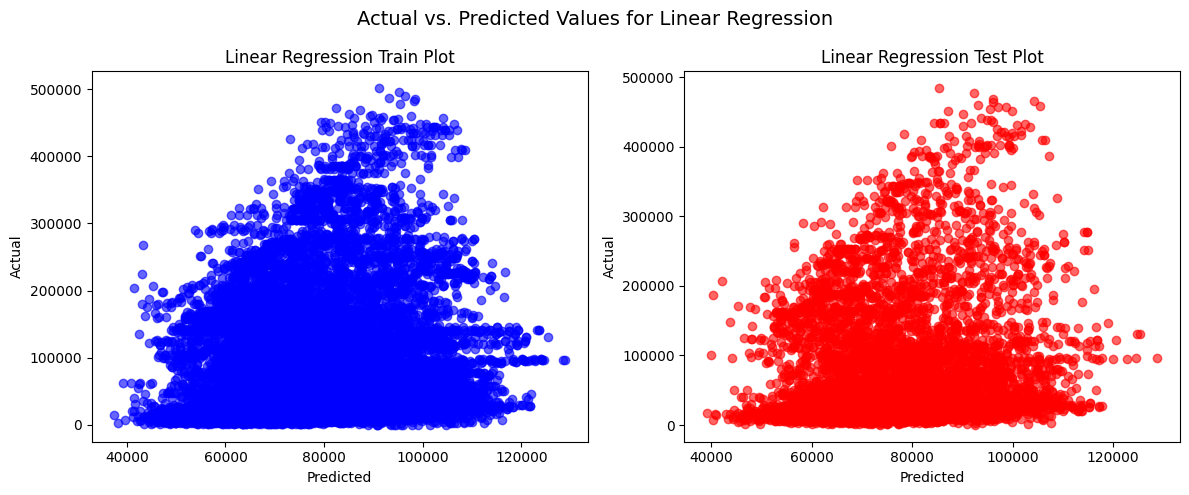

In [21]:
lr_results = regression_eval(
    "Linear Regression",
    lr,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test
    )

Train R²: 0.985155463218689
Train MSE: 106692040.0
Test R²: 0.9724090099334717
Test MSE: 201615264.0


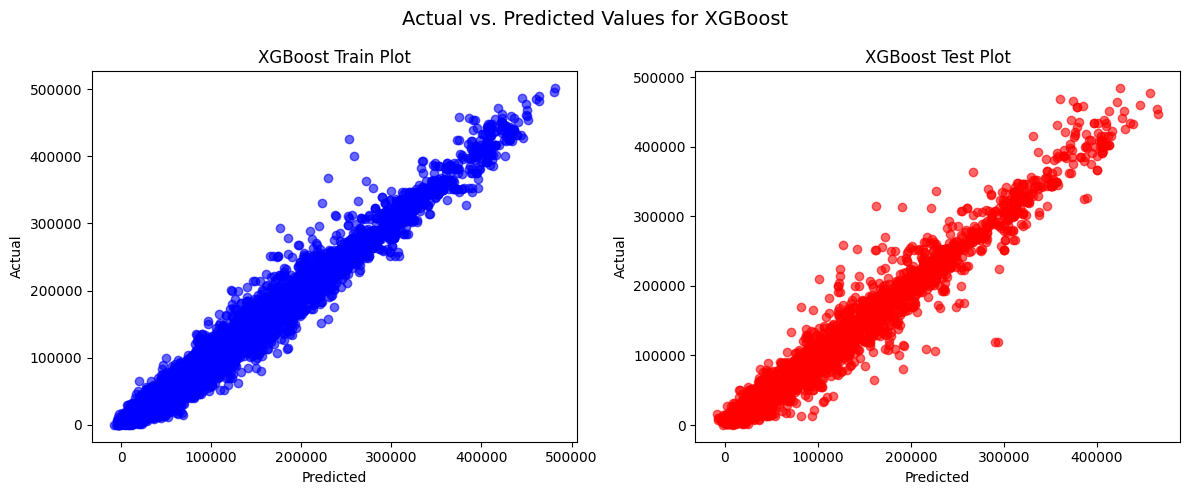

In [22]:
xgb_results = regression_eval(
    "XGBoost",
    xgb_model,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test
    )

Train R²: 0.9978300886998899
Train MSE: 15595814.556474123
Test R²: 0.9857990872986744
Test MSE: 103770194.72091952


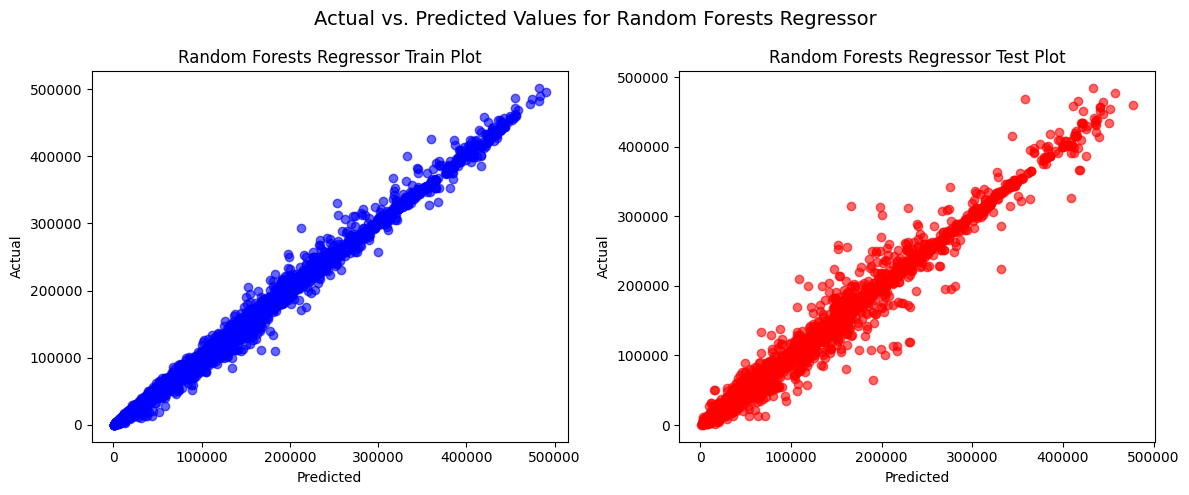

In [23]:
rf_results = regression_eval(
    "Random Forests Regressor",
    rf,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test
    )

In [27]:
result_df = pd.DataFrame({
    "Feature": X.columns,
    "LR Coeff": lr.coef_,
    "XGB Importance": xgb_model.feature_importances_,
    "RF Importance": rf.feature_importances_
})

In [28]:
result_df

Feature      LR Coeff  XGB Importance  RF Importance
0                           Area   2275.250629        0.092513       0.044497
1                           Item   4440.188107        0.423073       0.619822
2                           Year   7384.259579        0.026681       0.029967
3  average_rain_fall_mm_per_year   2836.525898        0.207645       0.106364
4              pesticides_tonnes   4633.479408        0.155325       0.104540
5                       avg_temp -10914.637475        0.094763       0.094809

In [62]:
# saving models
import joblib

joblib.dump(lr, "lr.pkl")
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(rf, "rf.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [79]:
one = df.head(1).drop("hg/ha_yield", axis=1)
one['Area'] = 0
one['Item'] = 0

In [80]:
one

Area  Item  Year  average_rain_fall_mm_per_year  pesticides_tonnes  \
0     0     0  1990                         1485.0              121.0   

   avg_temp  
0     16.37

In [81]:
xgb_model.predict(scaler.transform(one))

array([38572.96], dtype=float32)

In [82]:
model = joblib.load("./models/rf.pkl")

In [83]:
type(model)

sklearn.ensemble._forest.RandomForestRegressor